# Assignment 3

Data tersebut terkait dengan kampanye pemasaran langsung dari lembaga perbankan Portugis. Kampanye pemasaran didasarkan pada panggilan telepon. Seringkali, lebih dari satu kontak ke klien yang sama diperlukan, untuk mengakses apakah produk (deposit berjangka bank) akan ('ya') atau tidak ('tidak') berlangganan. Ada empat dataset:


*   bank-additional-full.csv dengan semua contoh (41188) dan 20 input, diurutkan berdasarkan tanggal (dari Mei 2008 hingga November 2010), sangat dekat dengan data yang dianalisis dalam [Moro et al., 2014]
*   bank-additional.csv dengan 10% contoh (4119), dipilih secara acak dari 1), dan 20 masukan.
*   bank-full.csv dengan semua contoh dan 17 input, diurutkan berdasarkan tanggal (versi lama dari kumpulan data ini dengan input yang lebih sedikit).
*   bank.csv dengan 10% contoh dan 17 masukan, dipilih secara acak dari 3 (versi lama kumpulan data ini dengan masukan lebih sedikit).

Kumpulan data terkecil disediakan untuk menguji algoritme pembelajaran mesin yang lebih menuntut komputasi (mis., SVM). Tujuan klasifikasi adalah untuk memprediksi apakah klien akan berlangganan (ya/tidak) deposito berjangka (variabel y).





# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, normalize, StandardScaler
from sklearn import metrics
import statsmodels.api as sm

%matplotlib inline

# Load Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
df = pd.read_csv('/content/drive/My Drive/dataset5/bank-additional-full.csv', sep=';')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
df.rename(columns={"default":"credit","y":"subscribed"},inplace=True)

# Mengecek kestabilan

Jumlah dari label atau output dari dataset

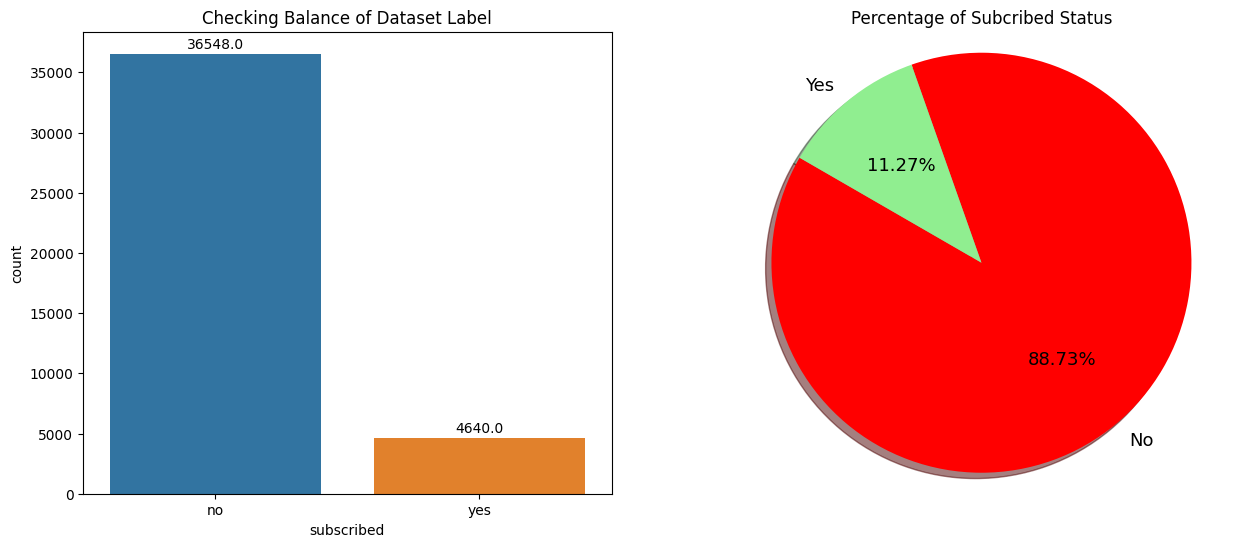

In [11]:
plt.rcParams['figure.figsize']=(15,6)
plt.subplot(121)
plt.title("Checking Balance of Dataset Label")
ax = sns.countplot(x='subscribed', data=df)
for i in ax.patches:
    ax.annotate(format(i.get_height(),'0.1f'), (i.get_x() + i.get_width()/2.,i.get_height()),
               ha='center', va='center', xytext=(0,7), textcoords='offset points')
    
plt.subplot(122)
plt.title("Percentage of Subcribed Status")
subscribed_values_count = df['subscribed'].value_counts()
subscribed_size = subscribed_values_count.values.tolist()
subscribed_labels = 'No', 'Yes'
colors=['red', 'lightgreen']
pcs, texts, autotexts = plt.pie(subscribed_size, labels=subscribed_labels, colors=colors,
                             autopct='%2.2f%%', shadow=True, startangle=150)

for text, autotext in zip(texts, autotexts):
    text.set_fontsize(13)
    autotext.set_fontsize(13)

plt.axis('equal')
plt.show()

Berdasarkan tampilan data diatas dapat dilihat bahwa jumlah label dari dataset yang telah digunakan yaitu Imbalanced, yang menandakan secara terlihat bahwa akan mempengaruhi kinerja dari model yang akan dihasilkan, sebab itu dilakukan balancing data

# Categorical columns exploration

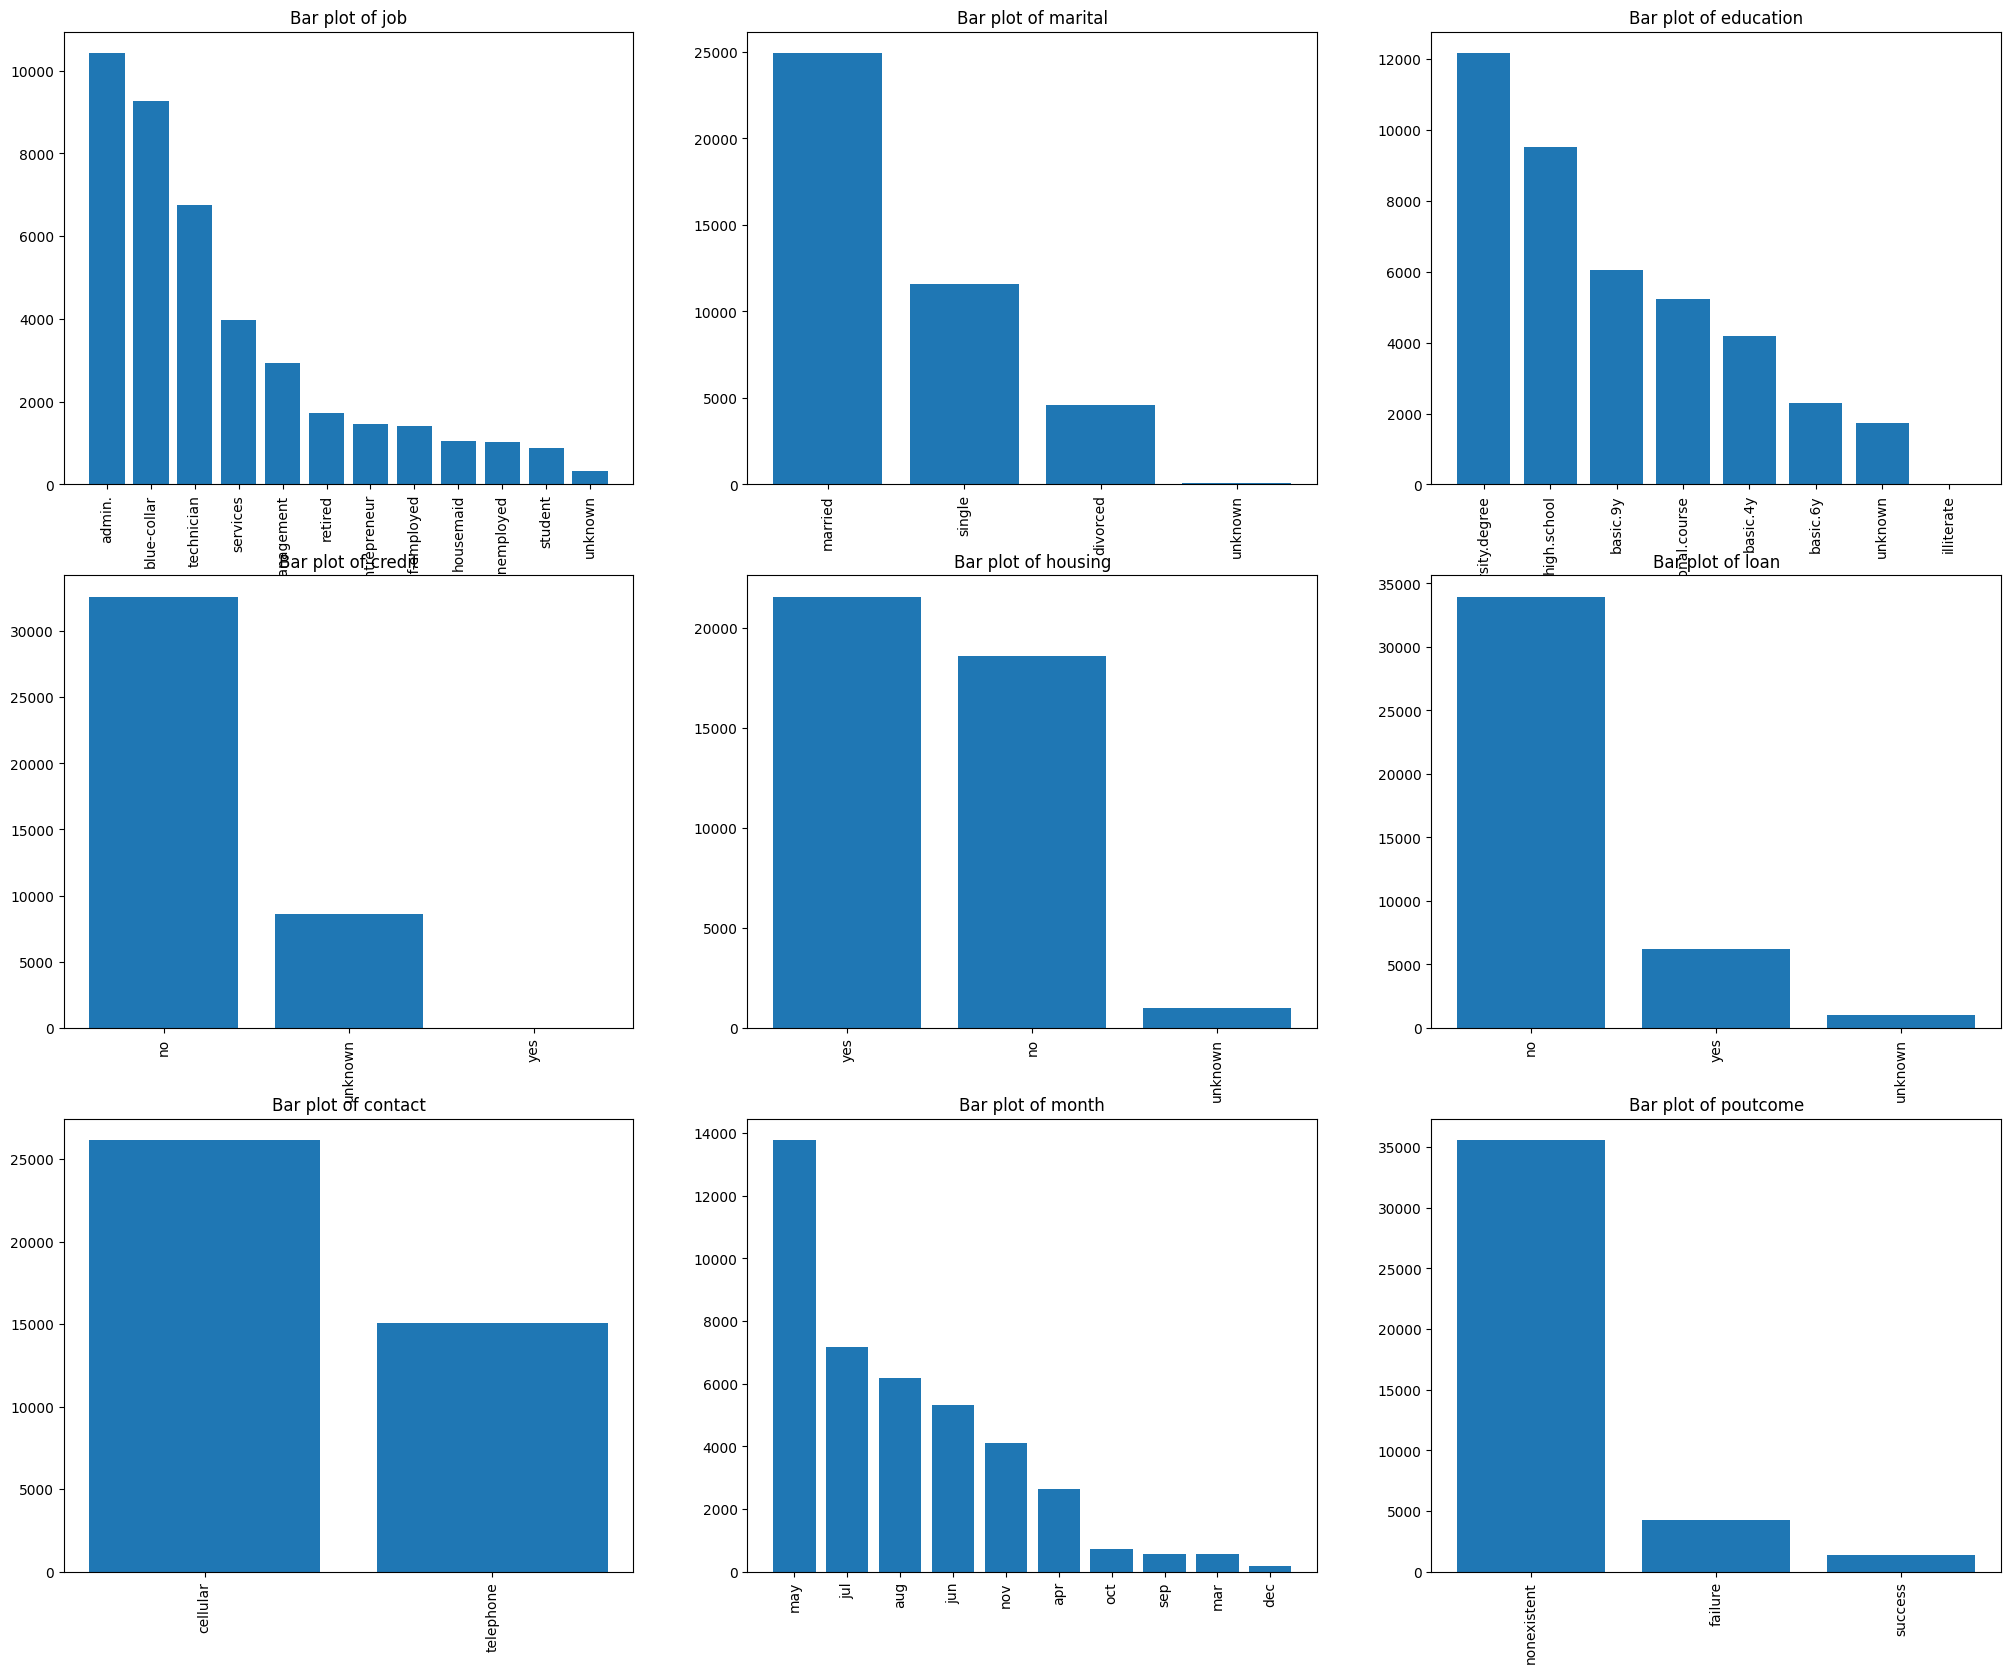

In [12]:
categorical_cols = ['job','marital','education','credit','housing',
                   'loan','contact','month','poutcome']
fig, ax = plt.subplots(3,3, sharex=False, sharey=False, figsize=(25,20))
count = 0
for cat_col in categorical_cols:
    value_count = df[cat_col].value_counts()
    ax_x = count//3
    ax_y = count%3
    x_range = np.arange(0, len(value_count))
    ax[ax_x, ax_y].bar(x_range, value_count.values, tick_label=value_count.index)
    ax[ax_x, ax_y].set_title(f"Bar plot of {cat_col}")
    
    for i in ax[ax_x, ax_y].get_xticklabels():
        i.set_rotation(90)
    
    count+=1
plt.show()
    

# Numerical columns exploration

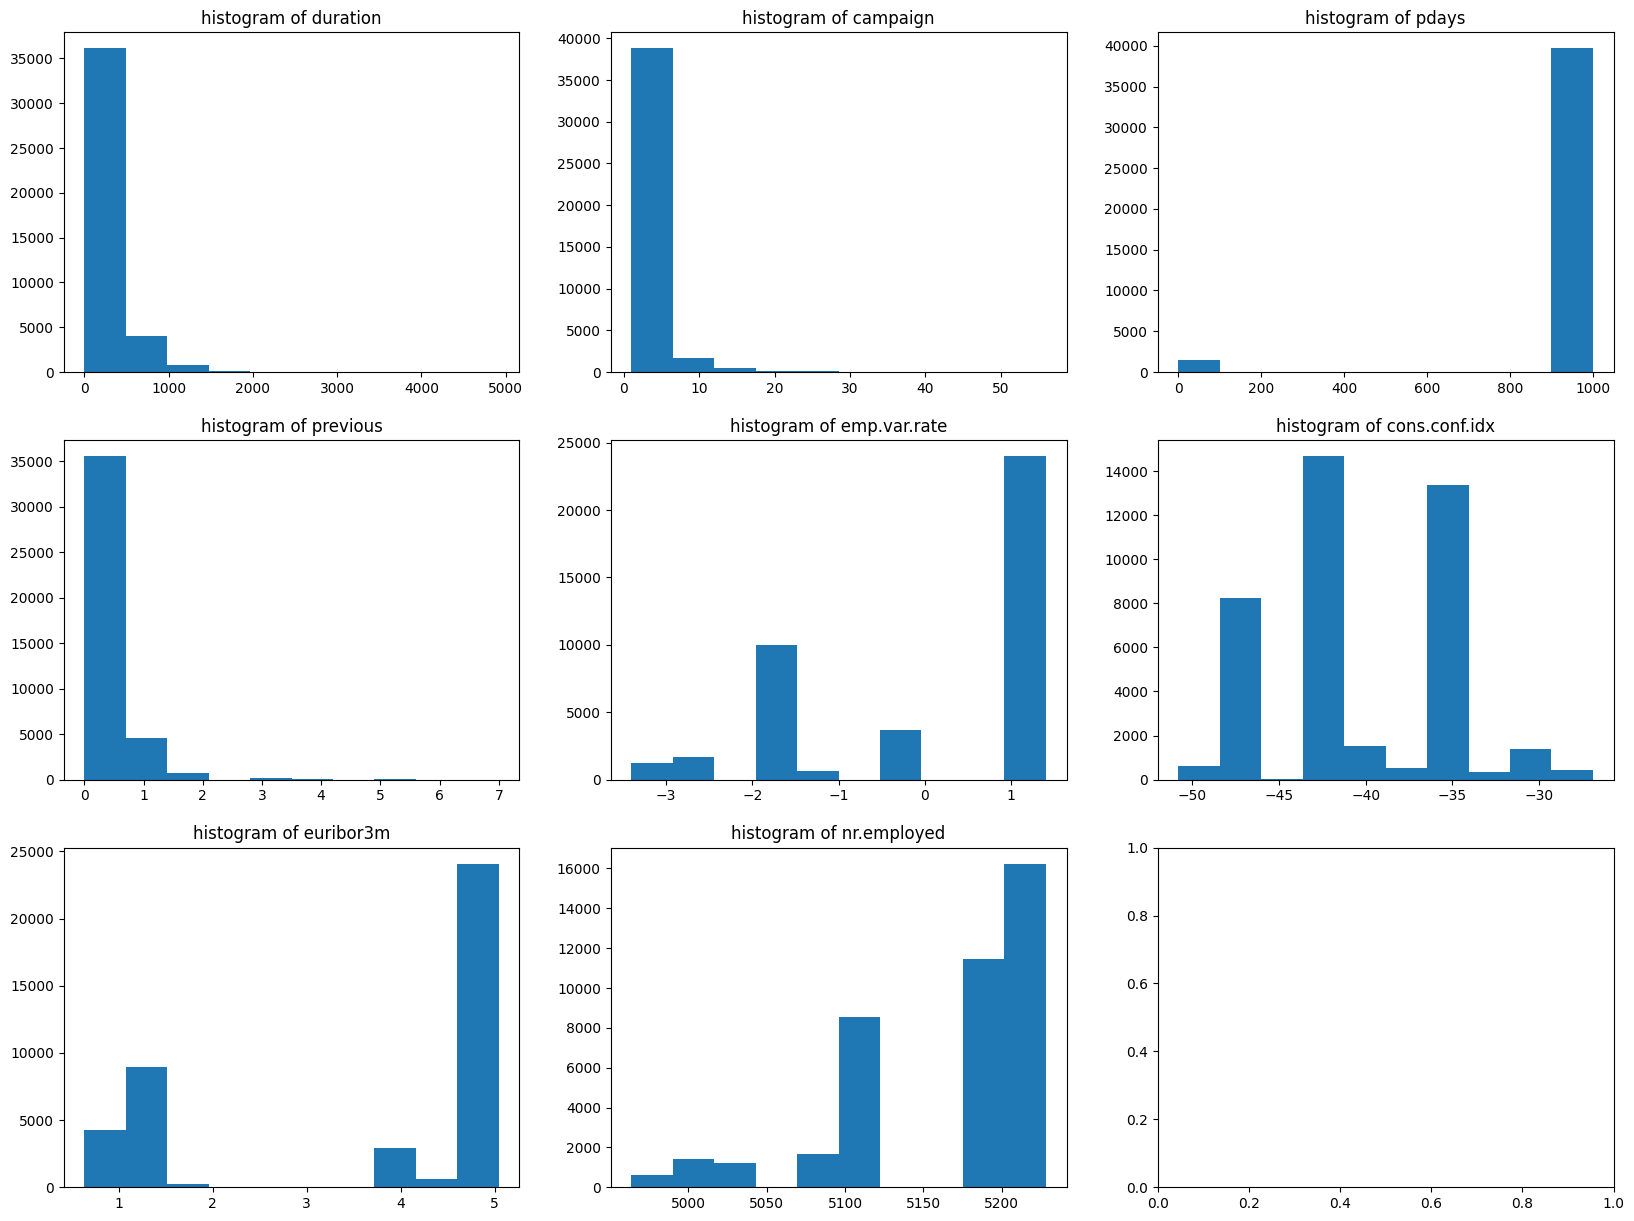

In [13]:
num_cols = ['duration','campaign','pdays','previous','emp.var.rate',
            'cons.conf.idx','euribor3m','nr.employed']

fig, ax = plt.subplots(3,3, sharex=False, sharey=False, figsize=(20,15))
count = 0
for num_col in num_cols:
    ax_x = count//3
    ax_y = count%3
    
    ax[ax_x, ax_y].hist(df[num_col])
    ax[ax_x, ax_y].set_title(f"histogram of {num_col}")
    count+=1
plt.show()

In [14]:
df['subscribed'].replace({'yes':1, 'no':0}, inplace=True)

In [15]:
corr = df.corr()
print(corr['subscribed'].sort_values(axis=0, ascending=True))

nr.employed      -0.354678
pdays            -0.324914
euribor3m        -0.307771
emp.var.rate     -0.298334
cons.price.idx   -0.136211
campaign         -0.066357
age               0.030399
cons.conf.idx     0.054878
previous          0.230181
duration          0.405274
subscribed        1.000000
Name: subscribed, dtype: float64


<ipython-input-15-25ca6e8b13b6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


# Drop features 

Menghilangkan features yang memiliki korelasi lebih sedikit dan tidak relevan dengan proses klasifikasi

In [16]:
df.drop(columns=['nr.employed','pdays','euribor3m','emp.var.rate',
    'cons.price.idx','day_of_week','cons.conf.idx','contact','month'],axis=0, inplace=True)

In [17]:
encoder = LabelEncoder()
col = ['marital','credit','housing','loan']

for i in col:
    df[i] = encoder.fit_transform(df[i])

In [18]:
cat_features = ['job','marital','education','credit','housing','loan','poutcome']
df = pd.get_dummies(df, columns=cat_features, drop_first=True)
df

,age,duration,campaign,previous,subscribed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,education_university.degree,education_unknown,credit_1,credit_2,housing_1,housing_2,loan_1,loan_2,poutcome_nonexistent,poutcome_success
0,56,261,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,57,149,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,37,226,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,40,151,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,56,307,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
41184,46,383,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
41185,56,189,2,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0
41186,44,442,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Assign Variabel Features dan Label

In [19]:
X = df.drop(columns='subscribed', axis=1).values
y = df['subscribed'].values

# Splitting Data Scaling

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=103)

In [21]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
ypred = model_lr.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test, ypred))
print(metrics.confusion_matrix(y_test, ypred))
print(metrics.classification_report(y_test, ypred))

Accuracy:  0.9076636724123979
[[10731   238]
 [  903   485]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10969
           1       0.67      0.35      0.46      1388

    accuracy                           0.91     12357
   macro avg       0.80      0.66      0.70     12357
weighted avg       0.89      0.91      0.89     12357



# Support Vector Machine

In [23]:
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
ypred2=svm_model.predict(X_test)
print("Acc: ", metrics.accuracy_score(y_test, ypred2))
print(metrics.confusion_matrix(y_test, ypred2))
print(metrics.classification_report(y_test, ypred2))

Acc:  0.902889050740471
[[10801   168]
 [ 1032   356]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     10969
           1       0.68      0.26      0.37      1388

    accuracy                           0.90     12357
   macro avg       0.80      0.62      0.66     12357
weighted avg       0.89      0.90      0.88     12357



# Ketepatan Handling Imbalanced Dataset

In [24]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [25]:
X_train_smote, y_train_smote= smote.fit_resample(X_train.astype('float'),y_train)

In [26]:
from collections import Counter
print("Before oversampling: ",Counter(y_train))
print("After oversampling: ",Counter(y_train_smote))

Before oversampling:  Counter({0: 25579, 1: 3252})
After oversampling:  Counter({0: 25579, 1: 25579})


# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
model_lr2 = LogisticRegression()
model_lr2.fit(X_train_smote, y_train_smote)
ypred_smote = model_lr2.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test, ypred_smote))
print(metrics.confusion_matrix(y_test, ypred_smote))
print(metrics.classification_report(y_test, ypred_smote))

Accuracy:  0.8392813789754795
[[9292 1677]
 [ 309 1079]]
              precision    recall  f1-score   support

           0       0.97      0.85      0.90     10969
           1       0.39      0.78      0.52      1388

    accuracy                           0.84     12357
   macro avg       0.68      0.81      0.71     12357
weighted avg       0.90      0.84      0.86     12357



# Support Vector Machine

In [28]:
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train_smote, y_train_smote)
ypred2=svm_model.predict(X_test)
print("Acc: ", metrics.accuracy_score(y_test, ypred2))
print(metrics.confusion_matrix(y_test, ypred2))
print(metrics.classification_report(y_test, ypred2))

Acc:  0.8259286234522942
[[9129 1840]
 [ 311 1077]]
              precision    recall  f1-score   support

           0       0.97      0.83      0.89     10969
           1       0.37      0.78      0.50      1388

    accuracy                           0.83     12357
   macro avg       0.67      0.80      0.70     12357
weighted avg       0.90      0.83      0.85     12357



# K-Nearest Neighbor

In [29]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train_smote, y_train_smote)
pred_cv5= KNN.predict(X_test)
print("ACC: ", metrics.accuracy_score(y_test, pred_cv5))
matrix5 = metrics.confusion_matrix(y_test, pred_cv5)
print(matrix5)
print(metrics.classification_report(y_test, pred_cv5))

ACC:  0.8109573521081168
[[9130 1839]
 [ 497  891]]
              precision    recall  f1-score   support

           0       0.95      0.83      0.89     10969
           1       0.33      0.64      0.43      1388

    accuracy                           0.81     12357
   macro avg       0.64      0.74      0.66     12357
weighted avg       0.88      0.81      0.84     12357



In [30]:
print("Accuracy menggunakan algoritma Logistik Regression pada imbalanced dataset : ",
      metrics.accuracy_score(y_test, ypred))
print(metrics.confusion_matrix(y_test, ypred))
recall1 = (10731)/(10731+238)
precision1= 10731/(10731+903)
print("precision : ", precision1)
print("recall: ",recall1)
print(metrics.classification_report(y_test, ypred))
print("Accuracy menggunakan algoritma Logistik Regression setelah melakukan balancing dataset: ",
     metrics.accuracy_score(y_test, ypred_smote))
print(metrics.confusion_matrix(y_test, ypred_smote))
recall2= 9282/(9282+1687)
precision2 = 9282/(9282+308)
print("precision: ",precision2)
print("recall: ", recall2)
print(metrics.classification_report(y_test,print(metrics.classification_report(y_test, ypred_smote))

Accuracy menggunakan algoritma Logistik Regression pada imbalanced dataset :  0.9076636724123979
[[10731   238]
 [  903   485]]
precision :  0.9223826714801444
recall:  0.9783024888321634
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10969
           1       0.67      0.35      0.46      1388

    accuracy                           0.91     12357
   macro avg       0.80      0.66      0.70     12357
weighted avg       0.89      0.91      0.89     12357

Accuracy menggunakan algoritma Logistik Regression setelah melakukan balancing dataset:  0.8392813789754795
[[9292 1677]
 [ 309 1079]]
precision:  0.9678832116788321
recall:  0.8462029355456286
              precision    recall  f1-score   support

           0       0.97      0.85      0.90     10969
           1       0.39      0.78      0.52      1388

    accuracy                           0.84     12357
   macro avg       0.68      0.81      0.71     12357
weighted avg       

Pada proses pengolahan data klasifikasi menggunakan algoritma logistic regression dikarenakan kestabilan prosesnya dihasilkan lebih baik dari algoritma lainnya kemudian waktu proses yang dihasilkan lebih baik. Hasil klasifikasi dengan dataset imbalanced dengan akurasi 0.91 kemudian hasil klasifikasi balancing dataset menggunakan cara oversampling SMOTE dengan akurasi 0.84. Dengan memiliki tingkat accuracy, precision, dan recall yang tinggi penggunaan dataset imbalanced masih berisiko pada performa model ketika ingin melakukan proses klasifikasi dengan dataset baru. Maka dari itu perlu dilakukan proses balancing data agar performa model yang terbentuk lebih optimal.